#**Thông tin sinh viên**

* MSSV: 19521388
* Họ và tên: Hoàng Tiến Dũng
* Lớp môn học: CS116.M11
* Bài tập 8: Phân lớp với mạng Neural Network

#**Cài đặt thư viện, hàm và dữ liệu cần thiết**

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier

In [3]:
data_path = "/content/drive/MyDrive/CS116/Churn_Modelling.csv"

#**1. Xử lí data**

##**1.1. Load data**

In [4]:
df = pd.read_csv(data_path)

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df = df.drop(df.columns[[0, 1, 2]], axis = 1)

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##**1.2. Column Transformer với OneHotEncoding**

In [10]:
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), ['Geography', 'Gender'])], remainder='passthrough')

In [11]:
dt_onehot = columnTransformer.fit_transform(df)

In [12]:
df_tranform = pd.DataFrame(dt_onehot)

In [13]:
df_tranform.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,0.0,0.0,1.0,0.0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,0.0,0.0,1.0,1.0,0.0,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,1.0,0.0,0.0,1.0,0.0,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,1.0,0.0,0.0,1.0,0.0,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,0.0,0.0,1.0,1.0,0.0,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0


##**1.3. Split data**

In [32]:
X = df_tranform[df_tranform.columns[0:13]].to_numpy()

In [36]:
y = df_tranform[df_tranform.columns[-1]]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##**1.4. Scale data**

In [41]:
scaler = StandardScaler()

In [42]:
X_train = scaler.fit_transform(X_train)

#**2. Xây dựng mạng Neural Network**

In [51]:
def create_model():
  model = Sequential()
  model.add(Dense(6, activation='relu', input_dim=13))
  model.add(Dense(6, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

#**3. Tinh chỉnh tham số và huấn luyện mô hình**

In [52]:
model = create_model()

In [53]:
batch_size = 32
epoch = 100

In [54]:
history = model.fit(X_train, y_train, epochs=epoch, batch_size=batch_size)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.6326 - accuracy: 0.6790
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4994 - accuracy: 0.7964
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4537 - accuracy: 0.8020
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4372 - accuracy: 0.8074
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4278 - accuracy: 0.8111
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4221 - accuracy: 0.8126
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4181 - accuracy: 0.8166
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4145 - accuracy: 0.8195
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4120 - accuracy: 0.8209
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4100 - accura

#**4. Kiểm tra và đánh giá độ chính xác**

##**4.1. Accuracy**

In [108]:
def predicttest(model, X_test_scale, threshold=0.5):
  y_pred = model.predict(X_test_scale)
  pred = list()
  for i in range(len(y_pred)):
    if(y_pred[i] > threshold):
      pred.append(1)
    else:
      pred.append(0)
  return pred

In [93]:
def draw_cf_matrix(cf_matrix, class_names):
  df_cm = pd.DataFrame(cf_matrix, index = [i for i in class_names],
                    columns = [i for i in class_names])
  plt.figure(figsize = (10,7))
  sns.heatmap(df_cm, annot=True)

In [89]:
X_test_scale = scaler.transform(X_test)

In [109]:
pred = (predicttest(model, X_test_scale))

In [105]:
a = accuracy_score(pred,y_test)
print('Accuracy is: {}%'.format(a*100))

Accuracy is: 86.2%


##**4.2. Confusion matrix**

In [96]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, pred, labels=[1, 0])

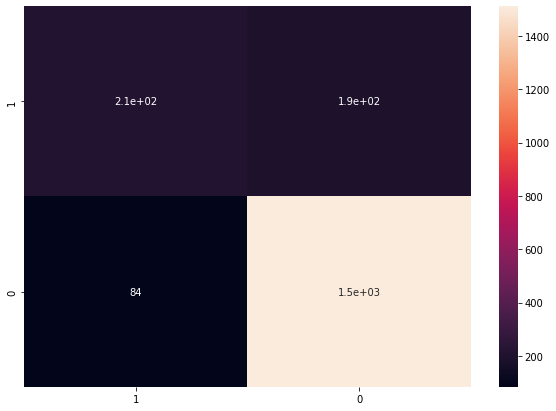

In [97]:
draw_cf_matrix(cf_matrix, [1, 0])

#**5. Thử nghiệm**

Dữ liệu:
* Geography: France
* Credit Score: 600
* Gender: Male
* Age: 40 years old
* Tenure: 3 years
* Balance: 60000
* No.of Products: 2
* Has credit card: Yes
* Active Member: Yes
* Estimated Salary: 50000

In [98]:
test = [[1, 0, 0, 0, 1, 600, 40, 3, 60000, 2, 1, 1, 50000]]
test = scaler.transform(test)
print(test)

[[ 0.98560362 -0.5698444  -0.57369368 -0.91601335  0.91601335 -0.52111599
   0.10961719 -0.68538967 -0.2569057   0.8095029   0.64259497  0.9687384
  -0.87203322]]


In [106]:
print(predicttest(model, test))

[0]


#**6. Đánh giá độ chính xác của mô hình bằng phương pháp KFold Cross Validation**

In [114]:
X_scale = scaler.transform(X)

In [111]:
kfold = KFold(n_splits=5, random_state=3, shuffle=True)

In [118]:
estimator = KerasClassifier(build_fn=create_model, epochs=100, batch_size=32, verbose=0)

In [119]:
results = cross_val_score(estimator, X_scale, y, scoring='accuracy', cv=kfold, n_jobs=-1)

In [122]:
print(results)

[0.861  0.854  0.862  0.8695 0.857 ]


In [121]:
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 86.07% (0.52%)
